<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [2]:
#Convertir en dataframe
Mexico= pd.read_csv("Mexico.csv", encoding="latin1")

In [3]:
#Verificamos información del DataFrame
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26401 non-null  object 
 1   source                                        26401 non-null  object 
 2   name                                          26401 non-null  object 
 3   description                                   25633 non-null  object 
 4   neighborhood_overview                         13970 non-null  object 
 5   host_id                                       26401 non-null  int64  
 6   host_name                                     25544 non-null  object 
 7   host_since                                    25487 non-null  object 
 8   host_location                                 20164 non-null  object 
 9   host_about                                    15164 non-null 

In [4]:
#Imprimo los primeros 5 registro del dataframe
Mexico.head()

last_scraped       source                                              name  \
0   26/06/2025  city scrape                                       Villa Dante   
1   01/07/2025  city scrape                                      Condesa Haus   
2   01/07/2025  city scrape              Great space in historical San Rafael   
3   01/07/2025  city scrape                 2 bedroom apt. deco bldg, Condesa   
4   01/07/2025  city scrape  Beautiful light Studio Coyoacan- full equipped !   

                                         description  \
0  Dentro de Villa un estudio de arte con futon, ...   
1  A new concept of hosting in mexico through a b...   
2  This great apartment is located in one of the ...   
3  Comfortably furnished, sunny, 2 bedroom apt., ...   
4  COYOACAN designer studio quiet & safe! well eq...   

                               neighborhood_overview  host_id host_name  \
0  Santa Fe Shopping Mall, Interlomas Park and th...   153786      Dici   
1                                                NaN   196253  Fernando   
2  Very traditional neighborhood with all service...   265650     Maris   
3                                                NaN   334451  Nicholas   
4  Coyoacan is a beautiful neighborhood famous fo...   212109    Trisha   

   host_since        host_location  \
0  28/06/2010  Mexico City, Mexico   
1  09/08/2010  Mexico City, Mexico   
2  19/10/2010  Mexico City, Mexico   
3  04/01/2011  Mexico City, Mexico   
4  24/08/2010  Mexico City, Mexico   

                                          host_about  ...  \
0  Master in visual arts, film photography & Mark...  ...   
1  Condesa Haus Rentals  offers independent  stud...  ...   
2  I am a University Professor now retired after ...  ...   
3  I am a journalist writing about food, (book an...  ...   
4  I am a mother, documentary film maker and phot...  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                         NaN                    NaN                 NaN   
1                        4.78                   4.98                4.47   
2                        4.94                   4.76                4.79   
3                        4.92                   4.98                4.92   
4                        4.98                   4.96                4.92   

  license instant_bookable  calculated_host_listings_count  \
0     NaN                f                               1   
1     NaN                f                               9   
2     NaN                f                               1   
3     NaN                f                               2   
4     NaN                f                               3   

   calculated_host_listings_count_entire_homes  \
0                                            1   
1                                            4   
2                                            1   
3                                            2   
4                                            2   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            2   
2                                            0   
3                                            0   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0               NaN  
1                                           0              0.39  
2                                           0              0.48  
3                                           0              0.30  
4                                           0              0.81  

[5 rows x 71 columns]

In [5]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Mexico['neighborhood_overview'].value_counts().reset_index()
Tabla_freq

neighborhood_overview  count
0      High-end, urbane Polanco is one of the most so...     64
1      Located just south of trendy Roma Norte, famil...     58
2      You will find yourself in one of the best area...     46
3      Known for its central location, making it easy...     38
4      Polanco is one of the most exclusive and luxur...     33
...                                                  ...    ...
10295  the colony is 10 minutes from Ciudad Universit...      1
10296  It is a traditional residential neighborhood f...      1
10297  You cannot visit the Cdmx without visiting thi...      1
10298  You can go for a walk with all the tranquility...      1
10299  Condesa is one of Mexico City's most vibrant a...      1

[10300 rows x 2 columns]

In [6]:
Tabla_freq_top2 = Mexico['host_location'].value_counts().reset_index()
Tabla_freq_top2

host_location  count
0          Mexico City, Mexico  16517
1                       Mexico    753
2    Ciudad de MÃ©xico, Mexico    332
3     Ciudad de Mexico, Mexico    190
4                 New York, NY    184
..                         ...    ...
395             Ajijic, Mexico      1
396            Morelos, Mexico      1
397   San Luis PotosÃ­, Mexico      1
398     Florida, United States      1
399        Saint-Cloud, France      1

[400 rows x 2 columns]

In [7]:
Tabla_freq_top3 = Mexico['host_about'].value_counts().reset_index()
Tabla_freq_top3

host_about  count
0     Somos Blueground, una empresa internacional de...    235
1     Â¡Hola! Soy el anfitriÃ³n que hace posible que...    177
2     Soy una anfitriona profesional, y estoy compro...    147
3     Wynwood House is a next-gen hospitality brand ...    142
4     We transform traditional apartments into Kukun...    123
...                                                 ...    ...
5916  Soy terapeuta de lenguaje Consultora y Comunic...      1
5917  Proud to be Mexican. The two things that I mos...      1
5918  I am a single mother of 2 teens and we love to...      1
5919  Viajar, leer y comer son tres actividades que ...      1
5920  Hi! I'm Alexis, originally from CDMX and passi...      1

[5921 rows x 2 columns]

In [8]:
Tabla_freq_top4 = Mexico['host_response_time'].value_counts().reset_index()
Tabla_freq_top4

host_response_time  count
0      within an hour  17811
1  within a few hours   1932
2        within a day   1060
3  a few days or more    912

In [9]:
Tabla_freq_top5 = Mexico['host_is_superhost'].value_counts().reset_index()
Tabla_freq_top5

host_is_superhost  count
0                 f  15365
1                 t   9677

In [10]:

Tabla_freq_top6 = Mexico['host_neighbourhood'].value_counts().reset_index()
Tabla_freq_top6

host_neighbourhood  count
0                                       Polanco   1639
1                                    Roma Norte   1029
2                                       Condesa    760
3                           Chapultepec Morales    670
4     Centro HistÃ³rico de la Ciudad de MÃ©xico    508
...                                         ...    ...
1003                                La Moraleda      1
1004                        juarez-roma-condesa      1
1005                EscandÃ³n segunda secciÃ³n       1
1006                           Tlalpan Centro I      1
1007                                 costa azul      1

[1008 rows x 2 columns]

In [11]:
Tabla_freq_top7 = Mexico['neighbourhood'].value_counts().reset_index()
Tabla_freq_top7

neighbourhood  count
0                                  Mexico City, Mexico  12719
1                    Centro, Ciudad de MÃ©xico, Mexico    196
2                Mexico City, Federal District, Mexico    160
3                   JuÃ¡rez, Ciudad de MÃ©xico, Mexico    141
4               Mexico City, Ciudad de MÃ©xico, Mexico     81
..                                                 ...    ...
312  Mexico City, CDMX sur de la ciudad zona reside...      1
313                     Ciudad de Los Deportes, Mexico      1
314                         Mexico City , CDMX, Mexico      1
315                Acopilco, Ciudad de MÃ©xico, Mexico      1
316   Juan RodrÃ­guez Clara, Ciudad de MÃ©xico, Mexico      1

[317 rows x 2 columns]

In [12]:
Tabla_freq_top8 = Mexico['neighbourhood_cleansed'].value_counts().reset_index()
Tabla_freq_top8

neighbourhood_cleansed  count
0              CuauhtÃ©moc  12113
1           Miguel Hidalgo   4486
2           Benito JuÃ¡rez   3051
3                CoyoacÃ¡n   1715
4         Ãlvaro ObregÃ³n    968
5      Venustiano Carranza    877
6                  Tlalpan    783
7        Gustavo A. Madero    525
8                Iztacalco    447
9    Cuajimalpa de Morelos    424
10            Azcapotzalco    374
11              Iztapalapa    280
12              Xochimilco    149
13  La Magdalena Contreras    135
14                TlÃ¡huac     44
15              Milpa Alta     30

In [13]:
Tabla_freq_top9 = Mexico['property_type'].value_counts().reset_index()
Tabla_freq_top9

property_type  count
0            Entire rental unit  10130
1                  Entire condo   3269
2   Private room in rental unit   3099
3          Private room in home   2313
4                   Entire loft   1473
..                          ...    ...
75       Private room in resort      1
76   Private room in lighthouse      1
77        Private room in tower      1
78                Entire in-law      1
79                        Tower      1

[80 rows x 2 columns]

In [14]:
Tabla_freq_top10 = Mexico['room_type'].value_counts().reset_index()
Tabla_freq_top10

room_type  count
0  Entire home/apt  17235
1     Private room   8867
2      Shared room    208
3       Hotel room     91

In [15]:
Tabla_freq_top11 = Mexico['amenities'].value_counts().reset_index()
Tabla_freq_top11

amenities  count
0                                                     []     24
1      ["Pets allowed", "Oven", "Kitchen", "Cooking b...     21
2      ["Patio or balcony", "Kitchen", "Cooking basic...     16
3      ["Carbon monoxide alarm", "First aid kit", "Ex...     16
4      ["Backyard", "Patio or balcony", "Kitchen", "S...     16
...                                                  ...    ...
25039  ["Free street parking", "Free parking on premi...      1
25040  ["Dining table", "Courtyard view", "Fire pit",...      1
25041  ["Gas stove", "Blender", "Exercise equipment",...      1
25042  ["Backyard", "Coffee maker", "Dedicated worksp...      1
25043  ["Dining table", "Free parking on premises", "...      1

[25044 rows x 2 columns]

In [16]:

Tabla_freq_top12 = Mexico['has_availability'].value_counts().reset_index()
Tabla_freq_top12

has_availability  count
0                t  25401

In [17]:
Tabla_freq_top13 = Mexico['license'].value_counts().reset_index()
Tabla_freq_top13

Empty DataFrame
Columns: [license, count]
Index: []

In [18]:
Tabla_freq_top14 = Mexico['instant_bookable'].value_counts().reset_index()
Tabla_freq_top14

instant_bookable  count
0                f  15697
1                t  10704

In [19]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>25]
Filtro

neighborhood_overview  count
0  High-end, urbane Polanco is one of the most so...     64
1  Located just south of trendy Roma Norte, famil...     58
2  You will find yourself in one of the best area...     46
3  Known for its central location, making it easy...     38
4  Polanco is one of the most exclusive and luxur...     33
5  Roma Norte is known for being the epicenter of...     33
6  Located in Santa Fe, one of the most modern an...     30
7  Enjoy Roma Norte a top neighborhood in Mexico ...     27
8  The colony is safe, you can move by bike or wa...     26
9  The Historic Center of Mexico City cannot be d...     26

In [20]:
Filtro2= Tabla_freq_top2[Tabla_freq_top2['count']>50]
Filtro2

host_location  count
0              Mexico City, Mexico  16517
1                           Mexico    753
2        Ciudad de MÃ©xico, Mexico    332
3         Ciudad de Mexico, Mexico    190
4                     New York, NY    184
5   Santiago de QuerÃ©taro, Mexico    182
6         Federal District, Mexico    181
7     Naucalpan de JuÃ¡rez, Mexico     88
8               Cuernavaca, Mexico     73
9              Guadalajara, Mexico     63
10         State of Mexico, Mexico     54

In [21]:
Filtro3= Tabla_freq_top3[Tabla_freq_top3['count']>70]
Filtro3

host_about  count
0   Somos Blueground, una empresa internacional de...    235
1   Â¡Hola! Soy el anfitriÃ³n que hace posible que...    177
2   Soy una anfitriona profesional, y estoy compro...    147
3   Wynwood House is a next-gen hospitality brand ...    142
4   We transform traditional apartments into Kukun...    123
5   Damas y Caballeros sirviendo a Damas y Caballe...    109
6   We are Capitalia, we will be happy to welcome ...     99
7   Homes with soul, where people from all over th...     89
8   Â¡Hola, viajeros! Mi casa de huÃ©spedes es amp...     82
9   Kasava Homes, con 3+ aÃ±os de experiencia, es ...     77
10  Soy anfitriona en Airbnb desde hace 6 aÃ±os y ...     76

In [22]:
Filtro4= Tabla_freq_top4[Tabla_freq_top4['count']>1]
Filtro4

host_response_time  count
0      within an hour  17811
1  within a few hours   1932
2        within a day   1060
3  a few days or more    912

In [23]:
Filtro5= Tabla_freq_top5[Tabla_freq_top5['count']>1]
Filtro5

host_is_superhost  count
0                 f  15365
1                 t   9677

In [24]:
Filtro6= Tabla_freq_top6[Tabla_freq_top6['count']>255]
Filtro6

host_neighbourhood  count
0                                     Polanco   1639
1                                  Roma Norte   1029
2                                     Condesa    760
3                         Chapultepec Morales    670
4   Centro HistÃ³rico de la Ciudad de MÃ©xico    508
5                         Colonia CuauhtÃ©moc    421
6                                  HipÃ³dromo    418
7                              Colonia Centro    410
8                           Centro HistÃ³rico    330
9                                   CoyoacÃ¡n    276
10                                    JuÃ¡rez    258

In [25]:
Filtro7= Tabla_freq_top7[Tabla_freq_top7['count']>15]
Filtro7

neighbourhood  count
0                           Mexico City, Mexico  12719
1             Centro, Ciudad de MÃ©xico, Mexico    196
2         Mexico City, Federal District, Mexico    160
3            JuÃ¡rez, Ciudad de MÃ©xico, Mexico    141
4        Mexico City, Ciudad de MÃ©xico, Mexico     81
5    Del Valle Norte, Ciudad de MÃ©xico, Mexico     37
6    Colonia JuÃ¡rez, Ciudad de MÃ©xico, Mexico     28
7                       Mexico City, DF, Mexico     24
8               HipÃ³dromo, CuauhtÃ©moc, Mexico     20
9        CuauhtÃ©moc, Ciudad de MÃ©xico, Mexico     17
10                      Mexico City, Ci, Mexico     16
11  Ejido del Centro, Ciudad de MÃ©xico, Mexico     16

In [26]:
Filtro8= Tabla_freq_top8[Tabla_freq_top8['count']>300]
Filtro8

neighbourhood_cleansed  count
0             CuauhtÃ©moc  12113
1          Miguel Hidalgo   4486
2          Benito JuÃ¡rez   3051
3               CoyoacÃ¡n   1715
4        Ãlvaro ObregÃ³n    968
5     Venustiano Carranza    877
6                 Tlalpan    783
7       Gustavo A. Madero    525
8               Iztacalco    447
9   Cuajimalpa de Morelos    424
10           Azcapotzalco    374

In [27]:
Filtro9= Tabla_freq_top9[Tabla_freq_top9['count']>250]
Filtro9

property_type  count
0                  Entire rental unit  10130
1                        Entire condo   3269
2         Private room in rental unit   3099
3                Private room in home   2313
4                         Entire loft   1473
5                         Entire home    806
6           Entire serviced apartment    794
7               Private room in condo    783
8                       Room in hotel    583
9          Private room in guesthouse    470
10  Private room in bed and breakfast    286
11        Private room in guest suite    256

In [28]:
Filtro10= Tabla_freq_top10[Tabla_freq_top10['count']>1]
Filtro10

room_type  count
0  Entire home/apt  17235
1     Private room   8867
2      Shared room    208
3       Hotel room     91

In [29]:
Filtro11= Tabla_freq_top11[Tabla_freq_top11['count']>10]
Filtro11

amenities  count
0                                                 []     24
1  ["Pets allowed", "Oven", "Kitchen", "Cooking b...     21
2  ["Patio or balcony", "Kitchen", "Cooking basic...     16
3  ["Carbon monoxide alarm", "First aid kit", "Ex...     16
4  ["Backyard", "Patio or balcony", "Kitchen", "S...     16
5  ["Backyard", "Kitchen", "Shampoo", "Elevator",...     14
6  ["Coffee maker", "Dedicated workspace", "Heati...     13
7  ["Building staff", "Dedicated workspace", "TV"...     12
8  ["Essentials", "Smoke alarm", "Exterior securi...     12
9  ["Backyard", "Patio or balcony", "Kitchen", "C...     12

In [30]:
Filtro12= Tabla_freq_top12[Tabla_freq_top12['count']>1]
Filtro12

has_availability  count
0                t  25401

In [31]:
Filtro13= Tabla_freq_top13[Tabla_freq_top13['count']>1]
Filtro13

Empty DataFrame
Columns: [license, count]
Index: []

In [32]:
Filtro14= Tabla_freq_top14[Tabla_freq_top14['count']>1]
Filtro14

instant_bookable  count
0                f  15697
1                t  10704

In [33]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('neighborhood_overview')
Filtro_index


count
neighborhood_overview                                    
High-end, urbane Polanco is one of the most sou...     64
Located just south of trendy Roma Norte, family...     58
You will find yourself in one of the best areas...     46
Known for its central location, making it easy ...     38
Polanco is one of the most exclusive and luxuri...     33
Roma Norte is known for being the epicenter of ...     33
Located in Santa Fe, one of the most modern and...     30
Enjoy Roma Norte a top neighborhood in Mexico C...     27
The colony is safe, you can move by bike or wal...     26
The Historic Center of Mexico City cannot be de...     26

In [34]:
Filtro_index_2= Filtro2.set_index('host_location')
Filtro_index_2

count
host_location                        
Mexico City, Mexico             16517
Mexico                            753
Ciudad de MÃ©xico, Mexico         332
Ciudad de Mexico, Mexico          190
New York, NY                      184
Santiago de QuerÃ©taro, Mexico    182
Federal District, Mexico          181
Naucalpan de JuÃ¡rez, Mexico       88
Cuernavaca, Mexico                 73
Guadalajara, Mexico                63
State of Mexico, Mexico            54

In [35]:
Filtro_index_3= Filtro3.set_index('host_about')
Filtro_index_3

count
host_about                                               
Somos Blueground, una empresa internacional de ...    235
Â¡Hola! Soy el anfitriÃ³n que hace posible que ...    177
Soy una anfitriona profesional, y estoy comprom...    147
Wynwood House is a next-gen hospitality brand t...    142
We transform traditional apartments into Kukuns...    123
Damas y Caballeros sirviendo a Damas y Caballeros     109
We are Capitalia, we will be happy to welcome y...     99
Homes with soul, where people from all over the...     89
Â¡Hola, viajeros! Mi casa de huÃ©spedes es ampl...     82
Kasava Homes, con 3+ aÃ±os de experiencia, es u...     77
Soy anfitriona en Airbnb desde hace 6 aÃ±os y m...     76

In [36]:
Filtro_index_4= Filtro4.set_index('host_response_time')
Filtro_index_4

count
host_response_time       
within an hour      17811
within a few hours   1932
within a day         1060
a few days or more    912

In [37]:
Filtro_index_5= Filtro5.set_index('host_is_superhost')
Filtro_index_5

count
host_is_superhost       
f                  15365
t                   9677

In [38]:
Filtro_index_6= Filtro6.set_index('host_neighbourhood')
Filtro_index_6

count
host_neighbourhood                              
Polanco                                     1639
Roma Norte                                  1029
Condesa                                      760
Chapultepec Morales                          670
Centro HistÃ³rico de la Ciudad de MÃ©xico    508
Colonia CuauhtÃ©moc                          421
HipÃ³dromo                                   418
Colonia Centro                               410
Centro HistÃ³rico                            330
CoyoacÃ¡n                                    276
JuÃ¡rez                                      258

In [39]:
Filtro_index_7= Filtro7.set_index('neighbourhood')
Filtro_index_7

count
neighbourhood                                     
Mexico City, Mexico                          12719
Centro, Ciudad de MÃ©xico, Mexico              196
Mexico City, Federal District, Mexico          160
JuÃ¡rez, Ciudad de MÃ©xico, Mexico             141
Mexico City, Ciudad de MÃ©xico, Mexico          81
Del Valle Norte, Ciudad de MÃ©xico, Mexico      37
Colonia JuÃ¡rez, Ciudad de MÃ©xico, Mexico      28
Mexico City, DF, Mexico                         24
HipÃ³dromo, CuauhtÃ©moc, Mexico                 20
CuauhtÃ©moc, Ciudad de MÃ©xico, Mexico          17
Mexico City, Ci, Mexico                         16
Ejido del Centro, Ciudad de MÃ©xico, Mexico     16

In [40]:
Filtro_index_8= Filtro8.set_index('neighbourhood_cleansed')
Filtro_index_8

count
neighbourhood_cleansed       
CuauhtÃ©moc             12113
Miguel Hidalgo           4486
Benito JuÃ¡rez           3051
CoyoacÃ¡n                1715
Ãlvaro ObregÃ³n          968
Venustiano Carranza       877
Tlalpan                   783
Gustavo A. Madero         525
Iztacalco                 447
Cuajimalpa de Morelos     424
Azcapotzalco              374

In [41]:
Filtro_index_9= Filtro9.set_index('property_type')
Filtro_index_9

count
property_type                           
Entire rental unit                 10130
Entire condo                        3269
Private room in rental unit         3099
Private room in home                2313
Entire loft                         1473
Entire home                          806
Entire serviced apartment            794
Private room in condo                783
Room in hotel                        583
Private room in guesthouse           470
Private room in bed and breakfast    286
Private room in guest suite          256

In [42]:
Filtro_index_10= Filtro10.set_index('room_type')
Filtro_index_10

count
room_type             
Entire home/apt  17235
Private room      8867
Shared room        208
Hotel room          91

In [43]:
Filtro_index_11= Filtro11.set_index('amenities')
Filtro_index_11

count
amenities                                                
[]                                                     24
["Pets allowed", "Oven", "Kitchen", "Cooking ba...     21
["Patio or balcony", "Kitchen", "Cooking basics...     16
["Carbon monoxide alarm", "First aid kit", "Ext...     16
["Backyard", "Patio or balcony", "Kitchen", "Sh...     16
["Backyard", "Kitchen", "Shampoo", "Elevator", ...     14
["Coffee maker", "Dedicated workspace", "Heatin...     13
["Building staff", "Dedicated workspace", "TV",...     12
["Essentials", "Smoke alarm", "Exterior securit...     12
["Backyard", "Patio or balcony", "Kitchen", "Co...     12

In [44]:
Filtro_index_12= Filtro12.set_index('has_availability')
Filtro_index_12

count
has_availability       
t                 25401

In [45]:
Filtro_index_13= Filtro13.set_index('license')
Filtro_index_13

Empty DataFrame
Columns: [count]
Index: []

In [46]:
Filtro_index_14= Filtro14.set_index('instant_bookable')
Filtro_index_14

count
instant_bookable       
f                 15697
t                 10704

Text(0, 0.5, 'Frecuencia')

C:\Users\balos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128 (\x80) missing from current font.
  func(*args, **kwargs)
C:\Users\balos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 156 (\x9c) missing from current font.
  func(*args, **kwargs)
C:\Users\balos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 157 (\x9d) missing from current font.
  func(*args, **kwargs)
C:\Users\balos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes

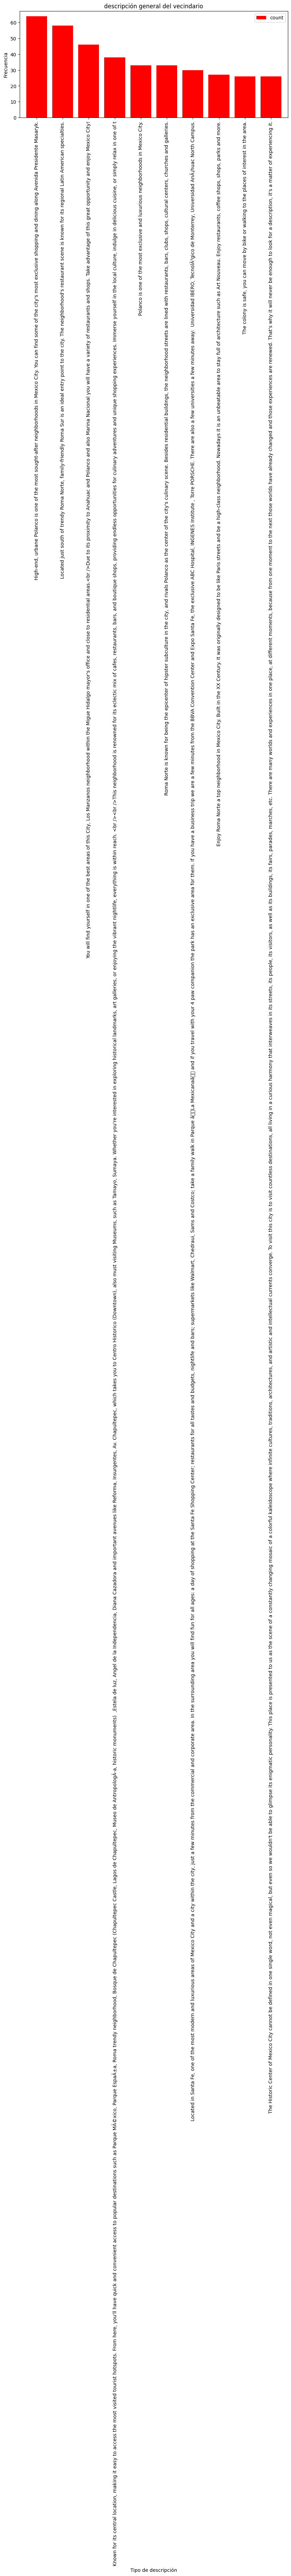

In [47]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('descripción general del vecindario')
plt.xlabel('Tipo de descripción')
plt.ylabel('Frecuencia')

In [48]:
Filtro_index_2.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Ubicación del anfitrión')
plt.xlabel('Lugar de origen')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

In [49]:
Filtro_index_3.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('anfitrión acerca de')
plt.xlabel('Descripción')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

C:\Users\balos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128 (\x80) missing from current font.
  func(*args, **kwargs)
C:\Users\balos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 147 (\x93) missing from current font.
  func(*args, **kwargs)
C:\Users\balos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\balos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.ca

Text(0, 0.5, 'Frecuencia')

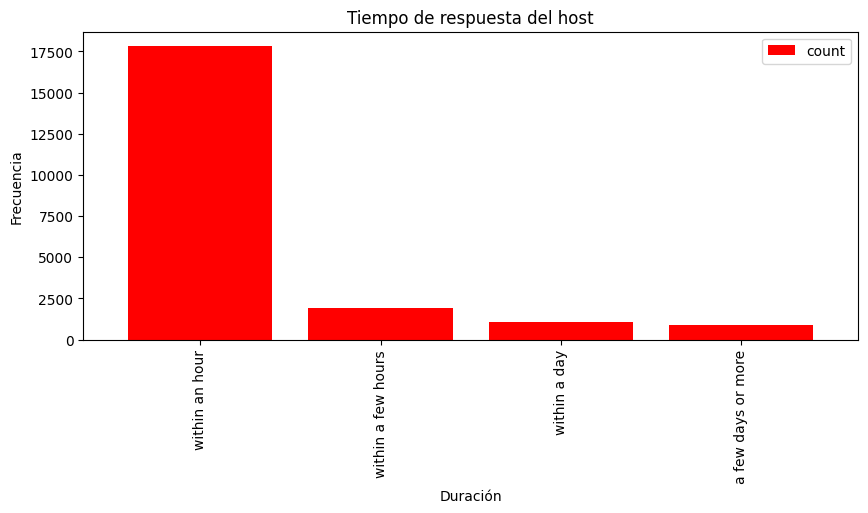

In [50]:
Filtro_index_4.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Tiempo de respuesta del host')
plt.xlabel('Duración')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

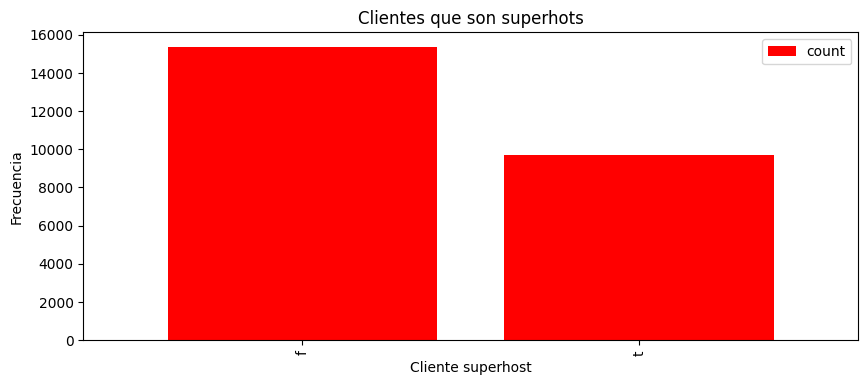

In [51]:
Filtro_index_5.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Clientes que son superhots')
plt.xlabel('Cliente superhost')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

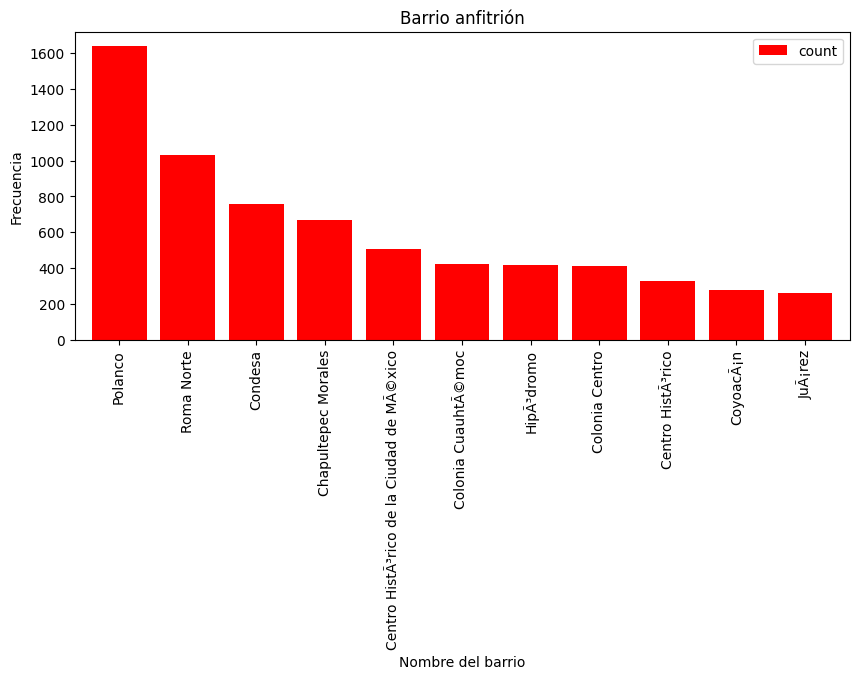

In [52]:
Filtro_index_6.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Barrio anfitrión')
plt.xlabel('Nombre del barrio')
plt.ylabel('Frecuencia')

In [53]:
Filtro_index_7.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Vecindario')
plt.xlabel('Nombre del vecindario')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

In [54]:
Filtro_index_8.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Limpieza del vecindario')
plt.xlabel('Vecindarios limpios')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

C:\Users\balos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 129 (\x81) missing from current font.
  func(*args, **kwargs)
C:\Users\balos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


Text(0, 0.5, 'Frecuencia')

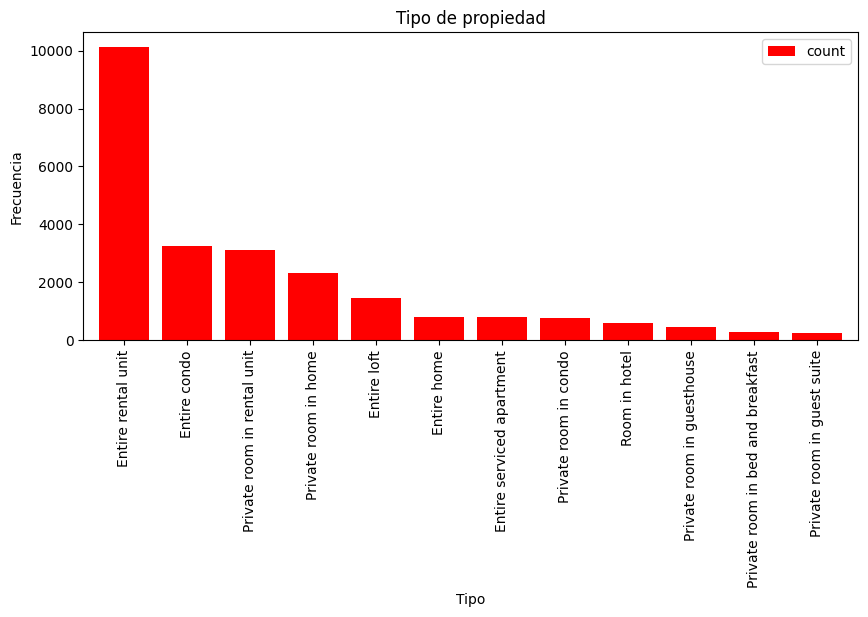

In [55]:
Filtro_index_9.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Tipo de propiedad')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')

In [56]:
Filtro_index_10.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Tipo de habitación')
plt.xlabel('Habitación')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

Text(0, 0.5, 'Frecuencia')

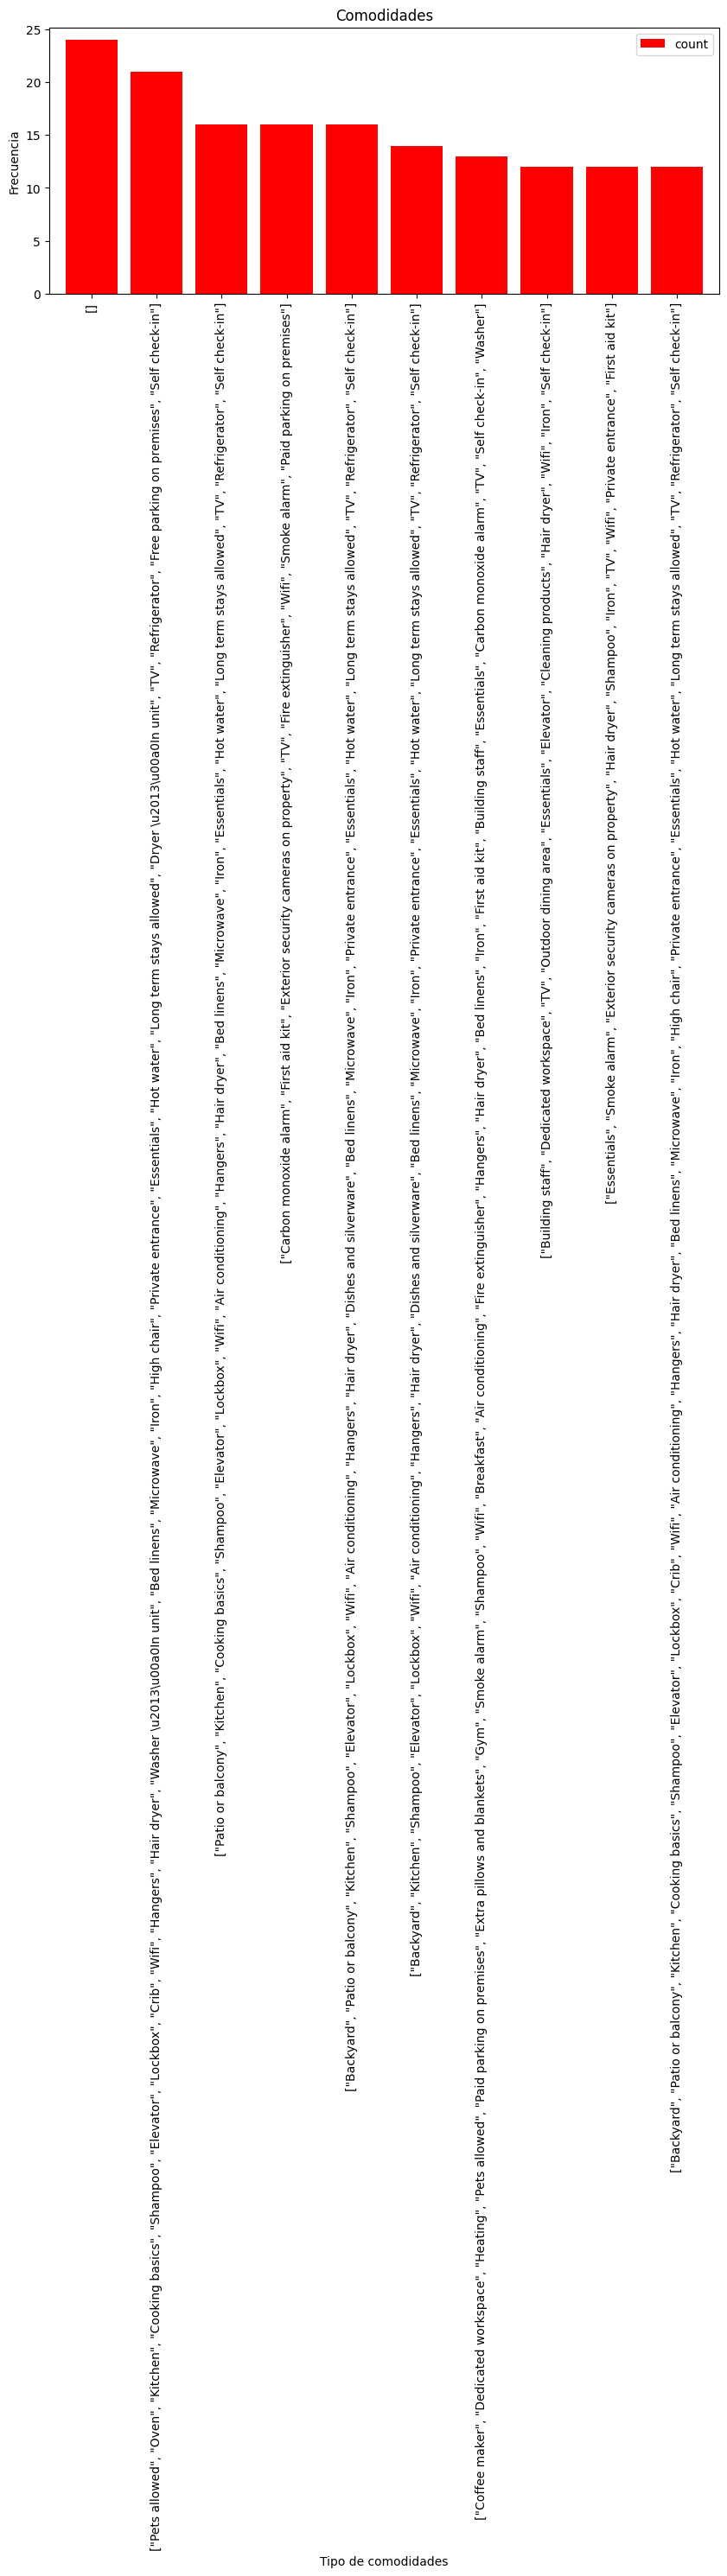

In [57]:
Filtro_index_11.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Comodidades')
plt.xlabel('Tipo de comodidades')
plt.ylabel('Frecuencia')

In [58]:
Filtro_index_12.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Tiene disponibilidad')
plt.xlabel('Disponible')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

In [ ]:
Filtro_index_13.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Licencia')
plt.xlabel('Tipo de licencia')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia')

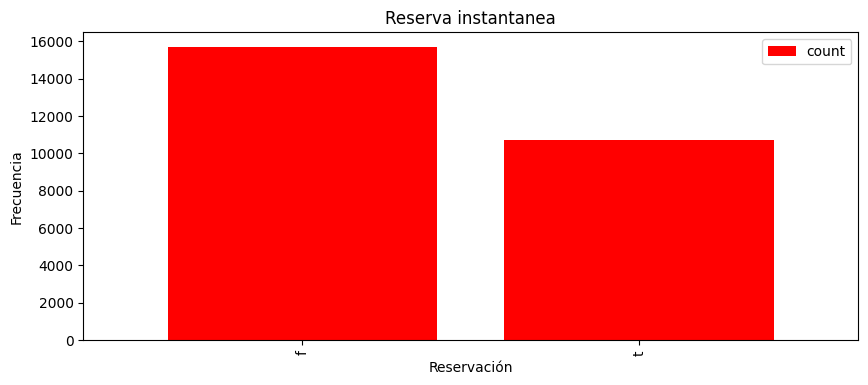

In [59]:
Filtro_index_14.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Reserva instantanea')
plt.xlabel('Reservación')
plt.ylabel('Frecuencia')

In [ ]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4),alpha = 1)

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["count"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")